In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from brian2 import *
from brian2.units.allunits import newton

In [2]:
# initial parameters

e = 1.6*10**-19 * coulomb# charge of 1 electron in Coulombs
K_c = e # Potassium^+1 ion charge 
Na_c = e # Sodium^+1 ion charge
Ca_c = 2*e # Calcium^+2 ion charge
Cl_c = -e # Chloride^-1 ion charge

K_m = (6.5 * 10**-26) * kgram # mass of potassium ion
Ca_m = (6.7 * 10**-26) * kgram # mass of calcium ion
Na_m = (3.8 * 10**-26) * kgram # mass of sodium ion
Cl_m = (2.1 * 10**-22) * kgram # mass of sodium ion

syn_l = 20 * nmeter # length of a synapse
rec_l = .5 * nmeter # length of an ion channel
M_l = 5 * nmeter # length of cell membrane

R_p = -70 * mV # resting potential
A_p = -55 * mV # action potential
Re_p = 30 * mV # repolarization begins
Ref_p = -90 * mV # refractory period minimum 

p_r = (10**6) # permeation rate
t_duration = .5 # firing threshold duration
d_duration = 2 # depolarization duration
r_duration = 1 # repolarization duration
rf_duration = 2 # refractory period duration


In [3]:
# equations

# Lorentz Force Equation F = qE
#V = A_p - R_p # acquire voltage difference across membrane
#W = e * E_f1 * M_l Work = Force time distance
#E_f = V / syn_l electric field  = change in voltage over change in distance
#F = e * E_f force = qE or particle times electric field
#F = Ca_m * v_Ca**2 / M_l Force = mass*velocity^2/radius 
#F_total = F * p_r * t_duration # total force of ions = force * permeation rate * duration
#v = np.sqrt(2 * Ca_c * E_f1 * M_l / Ca_m) # kinematics equation to determine velocity 

This project is about the electromagnetic forces within the cell membrane and ion movement. In particular, I will be looking at the force required for ions to travel inside or out of the cell.

In [4]:
V_t = A_p - R_p # acquire voltage difference
E_f1 = V_t / syn_l # Electric field = change in voltage over change in distance
F_syn_t = Ca_c * E_f1 # Force = charge of the particles times the electrical field

print("Force of electric field: ", F_syn_t) 
print("Change in membrane potential: ", V_t)
print("Electric field: ", E_f1)

Force of electric field:  240. fN
Change in membrane potential:  15. mV
Electric field:  750000. m kg s^-3 A^-1


For an action potential to be induced, the membrane potential must change from a resting potential of -70mV to -55mV. This is due to calcium ions entering the cell, in turn, making it more positive. The electrical gradient will change from calcium ions entering the cell resulting in ion channels to open. As a result, the neuron will spike in a process called depolarization. We can then use electromagnetic force equations to calculate the forces related to the action potential.

In [5]:
v_Ca = np.sqrt(2 * Ca_c * E_f1 * M_l / Ca_m) # 
F_Ca = Ca_m * v_Ca**2 / M_l

print("Velocity of ion: ", v_Ca)
print("Force of ion: ", F_Ca)

Velocity of ion:  189.26408936 m s^-1.0
Force of ion:  0.48 pN


4.8 * 10^-13 is the newtons of force that a calcium ion experiences to enter a cell. This is exactly double the force of the electrical field across the cell membrane because calcium is a +2 ion. The partical is moving in a centripetal motion towards its electrical gradient and if you look at the equations, everything cancels out except 2 * Ca_c (charge of calcium particles) * E_f1 (electric field). Now, we can calculate the total amount of force for all calcium ions rushing into the cell during depolarization.

In [6]:
F_total_Ca = F_Ca * p_r * t_duration

print("Total Force: ", F_total_Ca)

Total Force:  240. nN


About a million ions enter or leave the cell during an action potential in which we can use for our permeation rate. 

Text(0.5, 1.0, 'Change in Force on Calcium Ions')

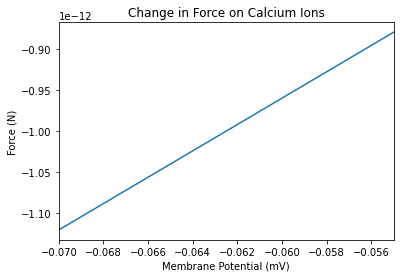

In [7]:
y = np.linspace(R_p, A_p, 1000)
function = (Ca_c * y / syn_l)
xlim(R_p, A_p)

plt.plot(y, function)
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Force (N)')
plt.title('Change in Force on Calcium Ions')

In the figure above we can see how the force acting on calcium ions increases as we move towards a more positive membrane potential. As you will later see, this is consistent with all ions as the electrical field changes voltage.

During deploarization sodium ion channels open allowing the ions to rush into the cell. Sodium ions will experience a different force because sodium channels typically open when the firing threshold has been reached. The new membrane potential will thus alter the electrical field.

In [8]:
V_a = Re_p - A_p # threshold to action potential
E_f2 = V_a / syn_l # Electric field = change in voltage over change in distance
F_syn_a = Na_c * E_f2 # Force = charge of the particles times the electrical field

print("Force of electric field: ", F_syn_a) 
print("Change in membrane potential: ", V_a)
print("Electric field: ", E_f2)

Force of electric field:  0.68 pN
Change in membrane potential:  85. mV
Electric field:  4250000. m kg s^-3 A^-1


In [9]:
v_Na = np.sqrt(2 * Na_c * E_f1 * M_l / Na_m) 
F_Na = Na_m * v_Na**2 / M_l

print("Velocity of ion: ", v_Na)
print("Force of ion: ", F_Na)

Velocity of ion:  177.70466333 m s^-1.0
Force of ion:  240. fN


In [10]:
F_total_Na = F_Na * p_r * d_duration

print("Total Force: ", F_total_Na)

Total Force:  0.48 uN


Text(0.5, 1.0, 'Change in Force on Sodium Ions')

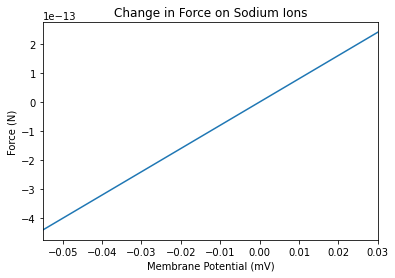

In [11]:
y = np.linspace(A_p, Re_p, 1000)
function = (Na_c * y / syn_l)
xlim(A_p, Re_p)

plt.plot(y, function)
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Force (N)')
plt.title('Change in Force on Sodium Ions')

After repeating the same steps for sodium ions under a new force, we can observe it is 6.8 * 10^-13 newtons. This is more than double the force created by the electical field before reaching the firing threshold. The force of the sodium ion to enter the cell is 2.4*10^-13 which is half of the calcium ion. This is expected because a sodium ion has half of the charge of a calcium ion. We can also observe that since we have a greater change in membrane potential the force acting on the ions should get stronger. 

In the next phase of an action potential, you have the repolarization which is when sodium channels close, but potassium channels open. 

In [12]:
V_re = Re_p - R_p # threshold to action potential
E_f3 = V_re / syn_l # Electric field = change in voltage over change in distance
F_syn_r = K_c * E_f3 # Force = charge of the particles times the electrical field

print("Force of electric field: ", F_syn_r) 
print("Change in membrane potential: ", V_re)
print("Electric field: ", E_f3)

Force of electric field:  0.8 pN
Change in membrane potential:  100. mV
Electric field:  5000000. m kg s^-3 A^-1


In [13]:
v_K = np.sqrt(2 * K_c * E_f3 * M_l / K_m) # 
F_k = K_m * v_K**2 / M_l

print("Velocity of ion: ", v_K)
print("Force of ion: ", F_k)

Velocity of ion:  350.82320772 m s^-1.0
Force of ion:  1.6 pN


In [14]:
F_total_K = F_k * p_r * r_duration

print("Total Force: ", F_total_K)

Total Force:  1.6 uN


Text(0.5, 1.0, 'Change in Force on Potassium Ions')

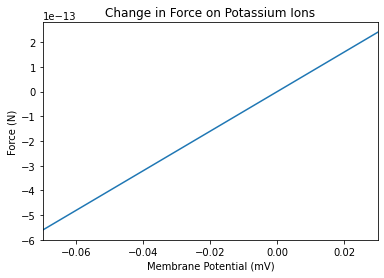

In [15]:
y = np.linspace(Re_p, R_p, 1000)
function = (K_c * y / syn_l)
xlim(R_p, Re_p)

plt.plot(y, function)
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Force (N)')
plt.title('Change in Force on Potassium Ions')

After looking at all potassium ion's forces, we can see a total force of 1.6 * 10^-6 newtons. The most important observation is that we have the strongest force acting upon the ions 8.0*10^-13 due to the greatest change in voltage, 100mV. Now, potassium ion channels will be closing and chloride ion channels will be opening. This phase is called hyperpolarization because the cell is becoming more negative than its resting potential.

In [16]:
V_ref = Ref_p - R_p # threshold to action potential
E_f4 = V_ref / syn_l # Electric field = change in voltage over change in distance
F_syn_ref = Cl_c * E_f4 # Force = charge of the particles times the electrical field

print("Force of electric field: ", F_syn_ref) 
print("Change in membrane potential: ", V_ref)
print("Electric field: ", E_f4)

Force of electric field:  160. fN
Change in membrane potential:  -20. mV
Electric field:  -1000000. m kg s^-3 A^-1


In [17]:
v_Cl = np.sqrt(2 * Cl_c * E_f4 * M_l / Cl_m) # 
F_Cl = Cl_m * v_Cl**2 / M_l

print("Velocity of ion: ", v_Cl)
print("Force of ion: ", F_Cl)

Velocity of ion:  2.76026224 m s^-1.0
Force of ion:  0.32 pN


In [18]:
F_total_Cl = F_Cl * p_r * rf_duration

print("Total Force: ", F_total_Cl)

Total Force:  0.64 uN


Text(0.5, 1.0, 'Change in Force on Chloride Ions')

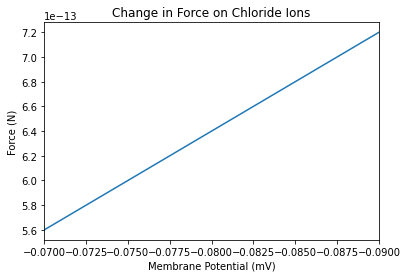

In [19]:
y = np.linspace(R_p, Ref_p, 1000)
function = (Cl_c * y / syn_l)
xlim(R_p, Ref_p)

plt.plot(y, function)
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Force (N)')
plt.title('Change in Force on Chloride Ions')

The figure above shows the change in force as we go from resting potential to hyperpolarization.

In [20]:
F_tot = (F_Cl + F_Na + F_k + F_Cl) / 4
print("Average force of these four ions: ", F_tot)

Average force of these four ions:  0.62 pN
